In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chukk\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('C:/Users/chukk/OneDrive/Documents/python/innomatics python/class/MACHINE LEARNING/winequality.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


Step 3 - Segregate Inputs (X) and Output (y)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [5]:
y = df['quality']

X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good','color']]

In [6]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [7]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4872, 13) (4872,)
(1625, 13) (1625,)


In [9]:
X_train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
good                      int64
color                    object
dtype: object

Separate Numerical and Categorical Features

In [10]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train_num), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
3731,0.272727,0.112,0.192771,0.525806,0.073456,0.163763,0.350230,0.547219,0.503876,0.089888,0.231884,0.0
1651,0.198347,0.064,0.198795,0.016129,0.075125,0.066202,0.175115,0.167745,0.465116,0.134831,0.420290,1.0
5060,0.239669,0.128,0.180723,0.104839,0.050083,0.358885,0.398618,0.206123,0.248062,0.207865,0.478261,1.0
1303,0.347107,0.160,0.265060,0.038710,0.115192,0.090592,0.142857,0.340664,0.496124,0.247191,0.463768,0.0
474,0.553719,0.160,0.307229,0.035484,0.113523,0.027875,0.041475,0.478223,0.372093,0.376404,0.202899,0.0


standardization

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
3731,-0.088021,-0.728201,0.005177,2.485175,-0.005890,1.029723,0.744625,1.752513,0.951116,-1.009331,-0.752815,-0.493127
1651,-0.785384,-1.090723,0.073901,-0.919647,0.022270,-0.530152,-0.596653,-1.250263,0.639915,-0.478861,0.340737,2.027875
5060,-0.397960,-0.607360,-0.132272,-0.327035,-0.400119,4.149473,1.115241,-0.946574,-1.102807,0.383154,0.677215,2.027875
1303,0.609341,-0.365678,0.829868,-0.768800,0.698091,-0.140184,-0.843731,0.118047,0.888876,0.847315,0.593095,-0.493127
474,2.546459,-0.365678,1.310939,-0.790350,0.669932,-1.142960,-1.620260,1.206553,-0.106966,2.372417,-0.921054,-0.493127


one hot encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, 
                               handle_unknown="ignore")

X_train_cat_transformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_transformed.shape)

X_train_cat_transformed.head()

Shape of Data before Transformation: (4872, 1)
Shape of Data after Transformation: (4872, 2)


,color_red,color_white
3731,0.0,1.0
1651,0.0,1.0
5060,0.0,1.0
1303,1.0,0.0
474,1.0,0.0


In [14]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color_red,color_white
3731,-0.088021,-0.728201,0.005177,2.485175,-0.005890,1.029723,0.744625,1.752513,0.951116,-1.009331,-0.752815,-0.493127,0.0,1.0
1651,-0.785384,-1.090723,0.073901,-0.919647,0.022270,-0.530152,-0.596653,-1.250263,0.639915,-0.478861,0.340737,2.027875,0.0,1.0
5060,-0.397960,-0.607360,-0.132272,-0.327035,-0.400119,4.149473,1.115241,-0.946574,-1.102807,0.383154,0.677215,2.027875,0.0,1.0
1303,0.609341,-0.365678,0.829868,-0.768800,0.698091,-0.140184,-0.843731,0.118047,0.888876,0.847315,0.593095,-0.493127,1.0,0.0
474,2.546459,-0.365678,1.310939,-0.790350,0.669932,-1.142960,-1.620260,1.206553,-0.106966,2.372417,-0.921054,-0.493127,1.0,0.0


Apply Data Preparation on Test Data

In [15]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [16]:
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
5316,-0.707899,-0.969882,-0.544617,-0.424008,-0.090367,-0.585862,0.056338,-0.318720,-0.667126,-0.081008,-1.089293,-0.493127
5210,-0.320475,-1.211564,-0.956963,-0.854998,-0.259323,-0.028764,-0.455466,-1.031880,0.328715,0.051610,0.593095,-0.493127
3518,0.066948,-0.728201,1.242214,1.795591,-0.203004,1.419691,1.291725,1.616023,0.141995,0.847315,-1.257531,-0.493127
1622,0.299402,1.990716,-1.231860,-0.833449,0.500976,-0.307313,0.921109,-0.328957,-1.040567,-0.147317,-1.005173,-0.493127
2443,0.066948,-0.788621,-0.200996,-0.811899,-0.625393,-0.084474,0.038689,-1.011406,0.515435,-0.213625,0.424856,2.027875


In [17]:
X_test_cat_transformed = pd.DataFrame(onehot_encoder.transform(X_test_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_transformed.head()

,color_red,color_white
5316,0.0,1.0
5210,0.0,1.0
3518,0.0,1.0
1622,0.0,1.0
2443,0.0,1.0


In [18]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color_red,color_white
5316,-0.707899,-0.969882,-0.544617,-0.424008,-0.090367,-0.585862,0.056338,-0.318720,-0.667126,-0.081008,-1.089293,-0.493127,0.0,1.0
5210,-0.320475,-1.211564,-0.956963,-0.854998,-0.259323,-0.028764,-0.455466,-1.031880,0.328715,0.051610,0.593095,-0.493127,0.0,1.0
3518,0.066948,-0.728201,1.242214,1.795591,-0.203004,1.419691,1.291725,1.616023,0.141995,0.847315,-1.257531,-0.493127,0.0,1.0
1622,0.299402,1.990716,-1.231860,-0.833449,0.500976,-0.307313,0.921109,-0.328957,-1.040567,-0.147317,-1.005173,-0.493127,0.0,1.0
2443,0.066948,-0.788621,-0.200996,-0.811899,-0.625393,-0.084474,0.038689,-1.011406,0.515435,-0.213625,0.424856,2.027875,0.0,1.0


### Step 6, 8 and 9 - Training and Testing Phase (Linear Regression)

In [19]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 0.43595268135804066

CPU times: total: 15.6 ms
Wall time: 1.22 s


In [20]:
output_df = pd.DataFrame({'Actual': y_test})

In [21]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
5316,6,5.437567
5210,6,5.808391
3518,6,5.550914
1622,5,4.859624
2443,8,7.118846
...,...,...
2152,7,6.917281
4019,7,7.273869
3732,6,5.751456
1315,6,5.186678


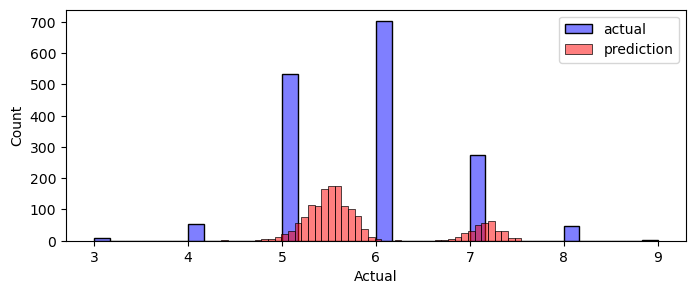

In [22]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Step 6, 8 and 9 - Training and Testing Phase (KNN Regression)

In [23]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 0.3842461538461539

CPU times: total: 172 ms
Wall time: 770 ms


In [24]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
5316,6,5.437567,5.6
5210,6,5.808391,6.0
3518,6,5.550914,5.2
1622,5,4.859624,4.8
2443,8,7.118846,7.2
...,...,...,...
2152,7,6.917281,7.0
4019,7,7.273869,7.2
3732,6,5.751456,5.6
1315,6,5.186678,5.4


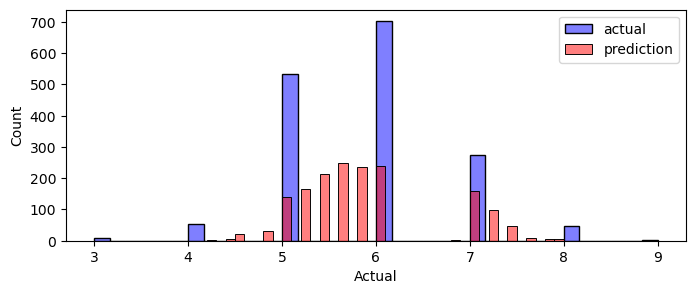

In [25]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Step 6, 8 and 9 - Training and Testing Phase (DT Regression)

In [26]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 0.3193846153846154

CPU times: total: 109 ms
Wall time: 618 ms


In [27]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
5316,6,5.437567,5.6,6.0
5210,6,5.808391,6.0,6.0
3518,6,5.550914,5.2,6.0
1622,5,4.859624,4.8,5.0
2443,8,7.118846,7.2,8.0
...,...,...,...,...
2152,7,6.917281,7.0,7.0
4019,7,7.273869,7.2,7.0
3732,6,5.751456,5.6,6.0
1315,6,5.186678,5.4,6.0


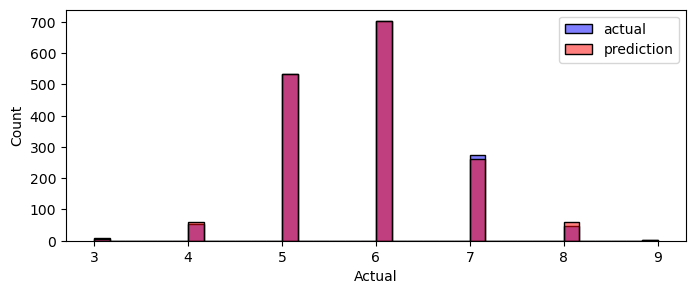

In [28]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Step 6, 8 and 9 - Training and Testing Phase (Random Forest Regression)

In [29]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()


Model's Error: 0.33056615384615373

CPU times: total: 7.12 s
Wall time: 12.6 s


In [30]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
5316,6,5.437567,5.6,6.0,5.53
5210,6,5.808391,6.0,6.0,5.97
3518,6,5.550914,5.2,6.0,5.63
1622,5,4.859624,4.8,5.0,4.75
2443,8,7.118846,7.2,8.0,7.71
...,...,...,...,...,...
2152,7,6.917281,7.0,7.0,7.01
4019,7,7.273869,7.2,7.0,7.09
3732,6,5.751456,5.6,6.0,5.84
1315,6,5.186678,5.4,6.0,5.80


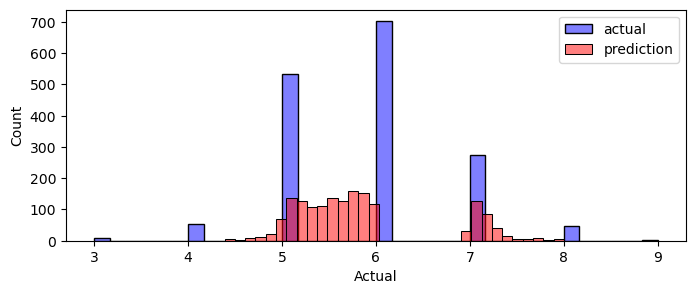

In [31]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Comparing all the Models

In [32]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,6.0
1,Actual,6.0
2,Actual,6.0
3,Actual,5.0
4,Actual,8.0


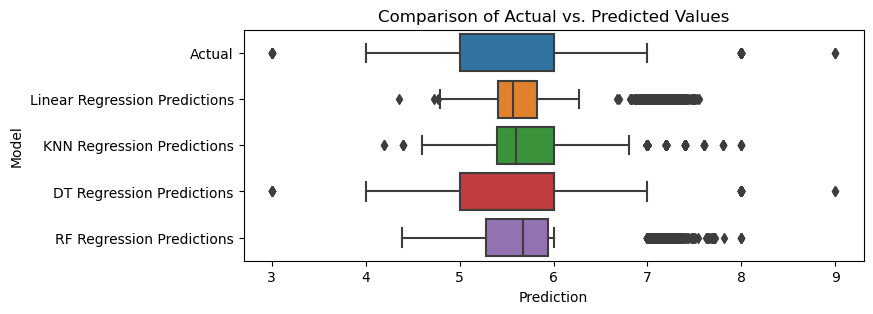

In [33]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()